In this project, I will try to use NFL play by play data to predict the best play on 4th down. As I am starting, I am not sure what the correct approach will be. I will start by exploring the dataset. [Here](https://pypi.org/project/nfl-data-py/) to the python library for interacting with the dataset. [Here](https://www.nflfastr.com/articles/field_descriptions.html) is documentation about the fields in the dataset.

In [1]:
import nfl_data_py as nfl
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns

In [2]:
'''
I'm going to start by importing the last 5 years 
of data. If I feel like I need more, I can always add
more years. The data goes all the way back to 1999
'''
data = nfl.import_pbp_data(years=[2022, 2021, 2020, 2019, 2018])

2022 done.
2021 done.
2020 done.
2019 done.
2018 done.
Downcasting floats.


In [3]:
numRows, numCols = len(data), len(data.columns)

print(f"{numRows} rows\n{numCols} cols")

245281 rows
384 cols


There are 384 columns and 245,281 rows. I think the best approach to start is to figure out what each column means. I am going to take a wild guess and say that I probably won't be using all columns.

In [8]:
for col in data.columns:
    print(col,"\n", data[col].dtype, data[col].value_counts(), "\n-----------------")

play_id 
 float32 play_id
1.0       1372
36.0       427
40.0       334
41.0       274
51.0       208
          ... 
5448.0       1
5415.0       1
5394.0       1
5333.0       1
4753.0       1
Name: count, Length: 5257, dtype: int64 
-----------------
game_id 
 object game_id
2019_01_DET_ARI    252
2019_16_CIN_MIA    248
2022_15_IND_MIN    243
2018_04_HOU_IND    241
2018_04_CLE_OAK    240
                  ... 
2022_08_SF_LA      149
2022_02_CHI_GB     149
2019_08_WAS_MIN    149
2021_16_DEN_LV     144
2019_07_SF_WAS     144
Name: count, Length: 1372, dtype: int64 
-----------------
old_game_id 
 object old_game_id
2019090809    252
2019122208    248
2022121700    243
2018093004    241
2018093009    240
             ... 
2022103010    149
2022091812    149
2019102400    149
2021122610    144
2019102007    144
Name: count, Length: 1372, dtype: int64 
-----------------
home_team 
 object home_team
KC     9437
TB     8281
BUF    8178
NO     8060
PHI    8056
LA     7946
SF     7940
DAL    787

fg_prob 
 float32 fg_prob
0.000000    29595
0.215226     1522
0.212601     1440
0.217728      356
0.208195      340
            ...  
0.262104        1
0.238043        1
0.185635        1
0.194717        1
0.757385        1
Name: count, Length: 192120, dtype: int64 
-----------------
safety_prob 
 float32 safety_prob
0.000000    30062
0.003265     1522
0.003828     1440
0.003372      356
0.003240      340
            ...  
0.004386        1
0.002680        1
0.002975        1
0.003272        1
0.000182        1
Name: count, Length: 192400, dtype: int64 
-----------------
td_prob 
 float32 td_prob
0.000000    30062
0.355046     1522
0.406750     1440
0.367752      356
0.381854      340
            ...  
0.342033        1
0.298445        1
0.441963        1
0.456193        1
0.001864        1
Name: count, Length: 191715, dtype: int64 
-----------------
extra_point_prob 
 float32 extra_point_prob
0.000000    238743
0.932427      4383
0.931429      1046
0.948828      1023
0.877911        3

vegas_home_wpa 
 float32 vegas_home_wpa
 0.000000e+00    28742
-8.344650e-07       26
-1.192093e-06       25
-7.152557e-07       24
-3.576279e-07       24
                 ...  
 1.026535e-02        1
 4.410940e-02        1
-1.260847e-01        1
-1.821005e-02        1
-6.936789e-04        1
Name: count, Length: 206818, dtype: int64 
-----------------
home_wp_post 
 float32 home_wp_post
1.000000    558
0.546262    523
0.566792    518
0.000000    510
0.584447    297
           ... 
0.949926      1
0.940113      1
0.945994      1
0.943031      1
0.002984      1
Name: count, Length: 149720, dtype: int64 
-----------------
away_wp_post 
 float32 away_wp_post
0.000000    572
0.453738    523
0.433208    518
1.000000    496
0.415553    297
           ... 
0.050074      1
0.059887      1
0.054006      1
0.056969      1
0.997016      1
Name: count, Length: 150191, dtype: int64 
-----------------
vegas_wp 
 float32 vegas_wp
0.421311    149
0.595943    140
0.614067    112
0.401232    109
0.441379

tackle_with_assist_1_player_id 
 object tackle_with_assist_1_player_id
00-0034846    73
00-0034673    63
00-0030114    62
00-0034743    61
00-0029255    61
              ..
00-0035390     1
00-0032448     1
00-0036243     1
00-0034602     1
00-0032635     1
Name: count, Length: 1509, dtype: int64 
-----------------
tackle_with_assist_1_player_name 
 object tackle_with_assist_1_player_name
D.Jones      88
T.Edmunds    71
D.Leonard    71
J.Poyer      62
J.Johnson    62
             ..
B.Cook        1
G.Arnold      1
A.DePaola     1
N.Lalos       1
K.Emanuel     1
Name: count, Length: 1421, dtype: int64 
-----------------
tackle_with_assist_1_team 
 object tackle_with_assist_1_team
BUF    612
IND    596
TEN    570
NE     562
NYG    528
PIT    512
LA     486
HOU    467
SEA    417
MIA    409
SF     397
ARI    391
LAC    389
GB     383
DET    383
LV     376
MIN    365
NYJ    346
WAS    333
CLE    332
ATL    326
JAX    314
BAL    309
DEN    307
CHI    304
CIN    302
TB     299
PHI    297
DAL 

weather 
 object weather
Temp: ° F, Wind:   mph                                        4171
Controlled Climate Temp: 68° F, Humidity: 70%, Wind:  mph     3794
Temp: Humidity: Wind:  mph                                    3481
N/A (Indoors) Temp: ° F, Wind:   mph                          2745
Controlled Climate Temp: 68° F, Humidity: 70%, Wind:   mph    2004
                                                              ... 
Clear Temp: 38° F, Humidity: 33%, Wind: N 6 mph                150
Cloudy Temp: 73° F, Humidity: 76%, Wind: SW 5 mph              149
Sunny Temp: 75° F, Humidity: 43%, Wind: SW 4 mph               149
Sunny Temp: 56° F, Humidity: 26%, Wind: S 14 mph               144
Rain Temp: 55° F, Humidity: 93%, Wind: NNE 12 mph              144
Name: count, Length: 1269, dtype: int64 
-----------------
nfl_api_id 
 object nfl_api_id
10160000-0579-1049-369d-40104333e452    252
10160000-0581-3275-015c-807b362c73da    248
10160000-0590-49c2-3a05-de110dffccbc    243
10160000-0576-20

result 
 int32 result
 3     21104
-3     16421
 7     11309
-7     10177
-6      8952
       ...  
-49      172
-38      167
 39      167
 33      165
-36      159
Name: count, Length: 85, dtype: int64 
-----------------
total 
 int32 total
51    10225
44    10206
40    10144
37     7585
41     7419
      ...  
93      197
94      194
83      184
88      181
6       172
Name: count, Length: 78, dtype: int64 
-----------------
spread_line 
 float32 spread_line
 3.0     19852
-3.0     13697
 3.5     13353
 2.5     12589
 1.0     10761
         ...  
-9.0       167
 20.0      167
-15.0      158
 19.0      157
 14.5      154
Name: count, Length: 69, dtype: int64 
-----------------
total_line 
 float32 total_line
44.0    14414
46.0    13238
47.0    12641
43.0    12232
48.0    11112
45.0     9646
44.5     9570
48.5     9527
45.5     9071
49.0     8460
46.5     8222
43.5     8129
41.0     8087
49.5     7977
42.0     7145
51.0     6918
47.5     6801
42.5     6699
41.5     6312
40.0     5957
5

qb_epa 
 float32 qb_epa
 0.000000    27757
 0.067573     4087
 0.068571      997
 0.051172      964
-0.947000      351
             ...  
 0.065545        1
-0.120969        1
-0.241984        1
 2.386013        1
-2.249168        1
Name: count, Length: 205290, dtype: int64 
-----------------
xyac_epa 
 float32 xyac_epa
0.847011    16
0.503370    14
0.500751    11
1.475486    10
0.503441    10
            ..
0.252129     1
0.897928     1
0.131860     1
0.940396     1
0.705562     1
Name: count, Length: 84677, dtype: int64 
-----------------
xyac_mean_yardage 
 float32 xyac_mean_yardage
3.911261    108
7.033303     98
7.089714     91
3.971373     80
4.275047     68
           ... 
4.528556      1
3.693461      1
4.290607      1
4.296000      1
5.860211      1
Name: count, Length: 63840, dtype: int64 
-----------------
xyac_median_yardage 
 float32 xyac_median_yardage
2.0     24865
3.0     14754
1.0     13029
4.0      8239
6.0      5875
5.0      5671
9.0      3491
7.0      3290
8.0      

In [9]:
cols_to_keep = [
    'home_team', # which team is the home team
    'game_id', # contains the year which will be important
    'season_type', # Reg or postseason game
    
    
    'week', # What week in the regular season
    'posteam', # team that has possession
    'posteam_type', # whether they are home or away
    'defteam', # defending team
    'yardline_100', # how many yards away from endzone are we?
    'quarter_seconds_remaining', # seconds left in the quarter
    'half_seconds_remaining',
    'game_seconds_remaining', # seconds left in game
    'game_half', # half1, half2, or overtime
    'drive' , # the drive number of the game
    'down' , # this will be crucial. I only want to look at 4th down plays
    'goal_to_go', # binary: is it a goal to go situation
    'ydstogo' , # this could be the most important feature
    'ydsnet', # length of the drive to this point
    
    'play_type', # pass, run, no_play, kickoff, punt, xp, fg, qb kneel, qb spike
    'run_location', # this will not be used to predict.
    'pass_location', 
    'pass_length',
    
    'no_huddle', # binary
    'posteam_timeouts_remaining',
    'defteam_timeouts_remaining',
    'posteam_score',
    'defteam_score',
    'score_differential',
    
    # probabilities of opponents scoring
    'no_score_prob', # Predicted probability of no score occurring for the rest of the half based on the expected points model.
    'opp_fg_prob', # for next drive
    'opp_td_prob', 
    
    # probabilities of possessing team scoring
    'fg_prob', # fg for this drive
    'td_prob',
    
    'ep', # expected points for play
    'epa', # expected points added 
    
    'wp', # win probability at start of play
    'vegas_wp',
    'wpa', # win probability added
    'vegas_wpa', # vegas's wpa
    
    'sack', # was the play a sack
    
    
    'fixed_drive', # driver number
    'drive_play_count',
    'drive_time_of_possession',
    
    'spread_line', # The closing spread line for the game. A positive number means the home team was favored by that many points, a negative number means the away team was favored by that many points

    'temp', # temperature at stadium
    'wind', # wind speed
    
    'passer', #name of qb
    'rusher', # name of rb
    'receiver', # name of receiver
    
]

Here is my idea: Create four different models: pass, run, punt, and fg. Each is trained as a regression model for the win probability added variable. For a given 4th down play, each model is run: the one that returrns the highest win probabity will be what  is chosen.

- One immediate concern with this approach: There are situations which teams would never pick one of the four options because they don't make sense. I think my model will need a way to filter out options initially. This means I need to find a way to determine obvious punt, field goal, run, or pass situations that overrides the model.
- Games that have already been decided will have little change in wpa for the play

- Another thing I am wondering is if you can disp

In [10]:
df = data[cols_to_keep]
fourth_down = df[df['down'] == 4]
fourth_down.head()

,home_team,game_id,season_type,week,posteam,posteam_type,defteam,yardline_100,quarter_seconds_remaining,half_seconds_remaining,...,sack,fixed_drive,drive_play_count,drive_time_of_possession,spread_line,temp,wind,passer,rusher,receiver
6,NYJ,2022_01_BAL_NYJ,REG,1,NYJ,home,BAL,64.0,833.0,1733.0,...,0.0,1.0,4.0,1:18,-6.5,NaN,NaN,None,None,None
14,NYJ,2022_01_BAL_NYJ,REG,1,BAL,away,NYJ,51.0,596.0,1496.0,...,0.0,2.0,6.0,3:53,-6.5,NaN,NaN,None,None,None
21,NYJ,2022_01_BAL_NYJ,REG,1,NYJ,home,BAL,82.0,432.0,1332.0,...,0.0,3.0,5.0,2:44,-6.5,NaN,NaN,None,None,None
25,NYJ,2022_01_BAL_NYJ,REG,1,BAL,away,NYJ,65.0,368.0,1268.0,...,0.0,4.0,3.0,1:04,-6.5,NaN,NaN,None,None,None
32,NYJ,2022_01_BAL_NYJ,REG,1,BAL,away,NYJ,6.0,199.0,1099.0,...,0.0,6.0,4.0,1:40,-6.5,NaN,NaN,None,None,None


In [11]:
def show_histogram(col, col_name, plot_title):
    plt.hist(col, bins=50, color='skyblue', edgecolor='black')
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.title(plot_title)
    plt.grid(True)

    # Show the histogram
    plt.show()

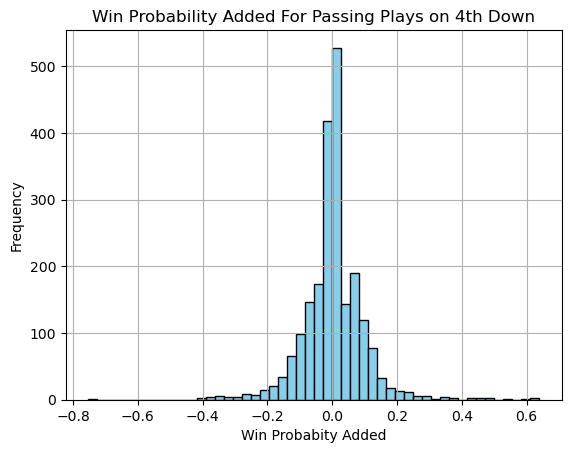

In [12]:
p = fourth_down[fourth_down['play_type'] == 'pass']['wpa']
show_histogram(p, 'Win Probabity Added', 'Win Probability Added For Passing Plays on 4th Down')

The bimodality is probably due to a distribution where a first down was achieved and a distribution where they failed to convert.

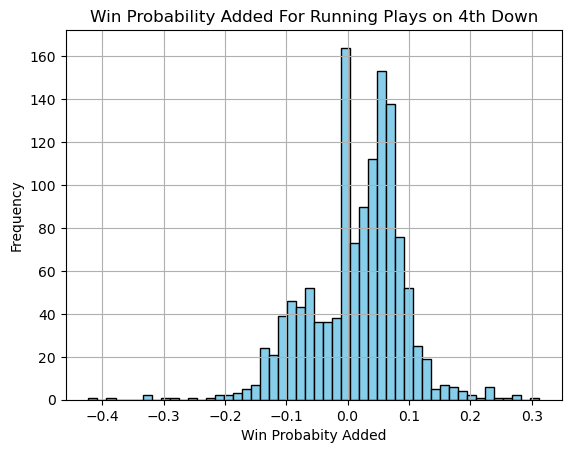

In [13]:
p = fourth_down[fourth_down['play_type'] == 'run']['wpa']
show_histogram(p, 'Win Probabity Added', 'Win Probability Added For Running Plays on 4th Down')

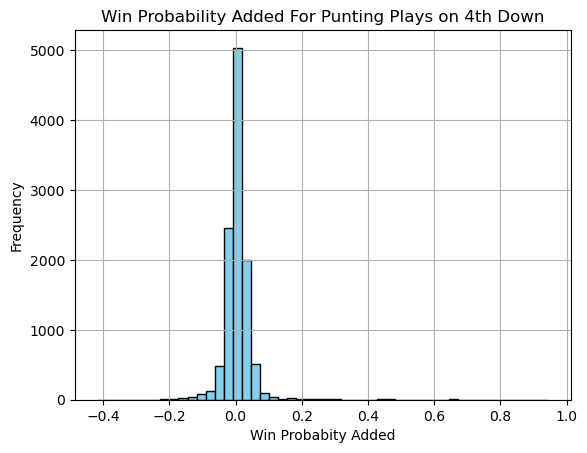

In [14]:
p = fourth_down[fourth_down['play_type'] == 'punt']['wpa']
show_histogram(p, 'Win Probabity Added', 'Win Probability Added For Punting Plays on 4th Down')

The tighter spread indicates that punting is the safer option. It is far less likely to affect the wpa.

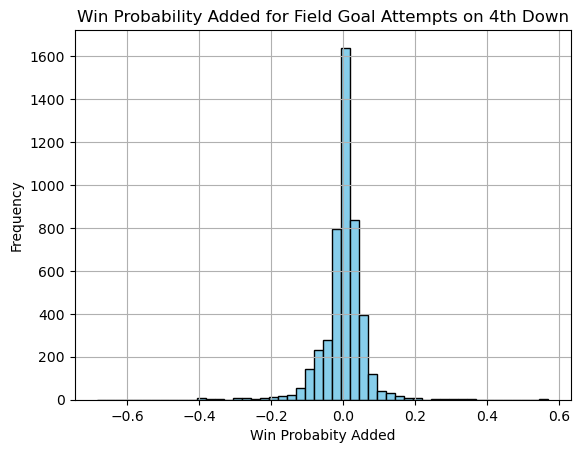

In [15]:
p = fourth_down[fourth_down['play_type'] == 'field_goal']['wpa']
show_histogram(p, 'Win Probabity Added', 'Win Probability Added for Field Goal Attempts on 4th Down')

In [16]:
fourth_down['wpa_difference'] = abs(fourth_down['wpa'] - fourth_down['vegas_wpa'])

/var/folders/bh/bkzmld751m5fdgn8m3_kzfmc0000gn/T/ipykernel_17480/2838542454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fourth_down['wpa_difference'] = abs(fourth_down['wpa'] - fourth_down['vegas_wpa'])


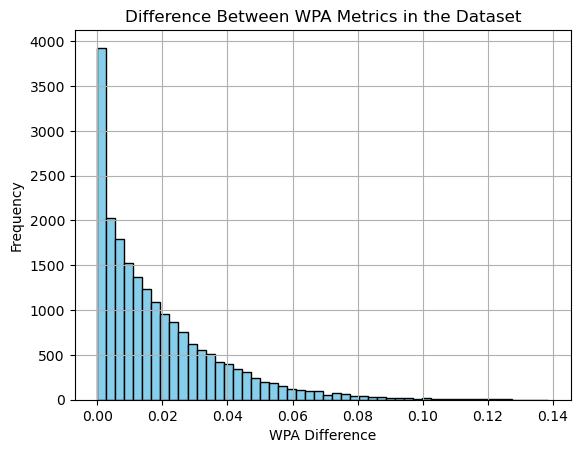

In [17]:
show_histogram(fourth_down['wpa_difference'], 'WPA Difference', "Difference Between WPA Metrics in the Dataset")



For a vast majority of cases, wpa and vegas wpa are within 0.05 or 5%. I think it is safe to take the average of the two and use that as a metric.

In [18]:
fourth_down['wpa_avg'] = (fourth_down['wpa'] + fourth_down['vegas_wpa']) / 2

/var/folders/bh/bkzmld751m5fdgn8m3_kzfmc0000gn/T/ipykernel_17480/3289469467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fourth_down['wpa_avg'] = (fourth_down['wpa'] + fourth_down['vegas_wpa']) / 2


I am going to start building some really basic linear regression models to get a baseline. Let's start with passing plays. I am going to use the yardline, seconds left in thee half, seconds left in the game, score differential, and yards to go to predict wpa.

In [19]:
fourth_down['posteam_is_home'] = fourth_down.apply(lambda row: row['posteam'] == row['home_team'], axis=1)
fourth_down['posteam_is_home']



/var/folders/bh/bkzmld751m5fdgn8m3_kzfmc0000gn/T/ipykernel_17480/190798725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fourth_down['posteam_is_home'] = fourth_down.apply(lambda row: row['posteam'] == row['home_team'], axis=1)


6          True
14        False
21         True
25        False
32        False
          ...  
245209    False
245220     True
245229    False
245243     True
245270    False
Name: posteam_is_home, Length: 20407, dtype: bool

<AxesSubplot:>

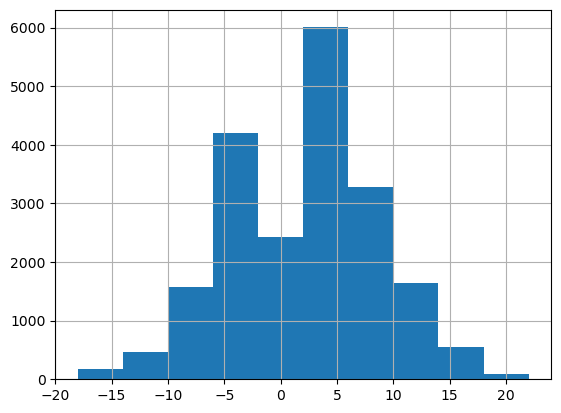

In [20]:
fourth_down['spread_line'].hist()

In [21]:
def align_spread(row): # adjust the spread so it aligns with the team with the ball instead of the home team
    if row["posteam_is_home"] is False:
        return row['spread_line'] * -1
    else:
        return row['spread_line']
        

fourth_down['posteam_spread_line'] = fourth_down.apply(align_spread, axis=1)


/var/folders/bh/bkzmld751m5fdgn8m3_kzfmc0000gn/T/ipykernel_17480/3955383669.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fourth_down['posteam_spread_line'] = fourth_down.apply(align_spread, axis=1)


<AxesSubplot:>

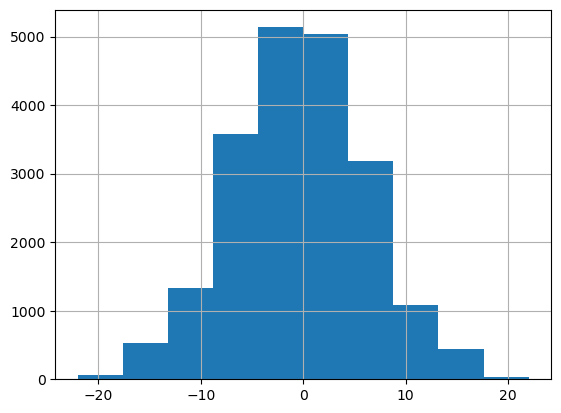

In [22]:
fourth_down['posteam_spread_line'].hist()

In [23]:
fourth_down['wp_avg'] = fourth_down.apply(lambda row: (row['wp'] + row["vegas_wp"]) / 2, axis=1)
fourth_down['is_reg_season'] = fourth_down['season_type'].apply(lambda x: True if x == "REG" else False)



/var/folders/bh/bkzmld751m5fdgn8m3_kzfmc0000gn/T/ipykernel_17480/3557438487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fourth_down['wp_avg'] = fourth_down.apply(lambda row: (row['wp'] + row["vegas_wp"]) / 2, axis=1)
/var/folders/bh/bkzmld751m5fdgn8m3_kzfmc0000gn/T/ipykernel_17480/3557438487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fourth_down['is_reg_season'] = fourth_down['season_type'].apply(lambda x: True if x == "REG" else False)


In [24]:
print(fourth_down['wind'].isna().sum())
len(fourth_down['wind'].isna().values == fourth_down['temp'].isna().values)

10257


20407

There are 10,257 missing values in the wind and temp columns. Let's see if this has something to do with the stadium where the game is being played.

In [25]:
fourth_down['weather_not_reported'] = fourth_down['wind'].isna()
home_team_when_weather_not_reported = fourth_down['home_team'][fourth_down['weather_not_reported'] == True]
len(home_team_when_weather_not_reported.unique())

/var/folders/bh/bkzmld751m5fdgn8m3_kzfmc0000gn/T/ipykernel_17480/280677247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fourth_down['weather_not_reported'] = fourth_down['wind'].isna()


32

Looks like all 32 teams have games where they don't report weather, so we won't include the temp and wind variables.

In [26]:
y_col = 'wpa_avg'
x_cols = [
        'drive',
        'yardline_100',
        'game_seconds_remaining',
        'goal_to_go',
        'ydstogo',
        'ydsnet',
        'score_differential',
        'opp_fg_prob',
        'opp_td_prob', 
        'fg_prob',
        'td_prob',
        'drive_play_count',
        'posteam_spread_line',
        'wp_avg']

In [27]:
passing = fourth_down[fourth_down['play_type'] == "pass"]
X = passing[x_cols]
y = passing[y_col]

<AxesSubplot:title={'center':'Win Probability vs Win Probability Added on 4th Down Passing Plays'}, xlabel='wp_avg', ylabel='wpa_avg'>

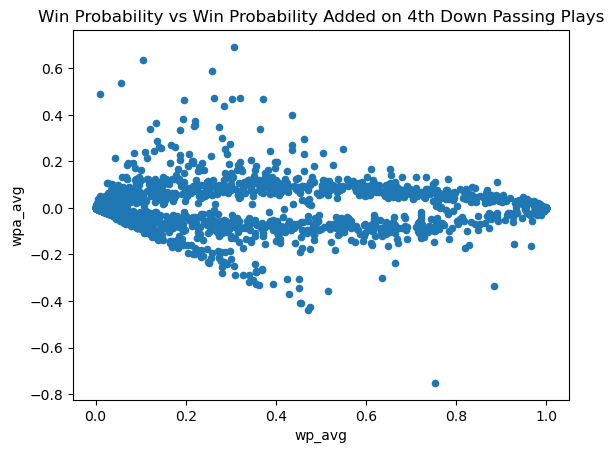

In [28]:
passing.plot("wp_avg", "wpa_avg", kind='scatter', title="Win Probability vs Win Probability Added on 4th Down Passing Plays")

<AxesSubplot:title={'center':'Win Probability vs Win Probability Added on 4th Down Passing Plays'}, xlabel='ydsnet', ylabel='wpa_avg'>

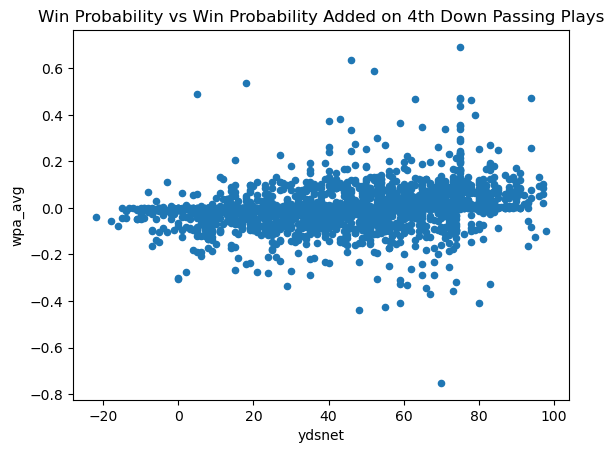

In [29]:
passing.plot("ydsnet", "wpa_avg", kind='scatter', title="Win Probability vs Win Probability Added on 4th Down Passing Plays")

/Users/lucasderr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucasderr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucasderr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lucasderr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

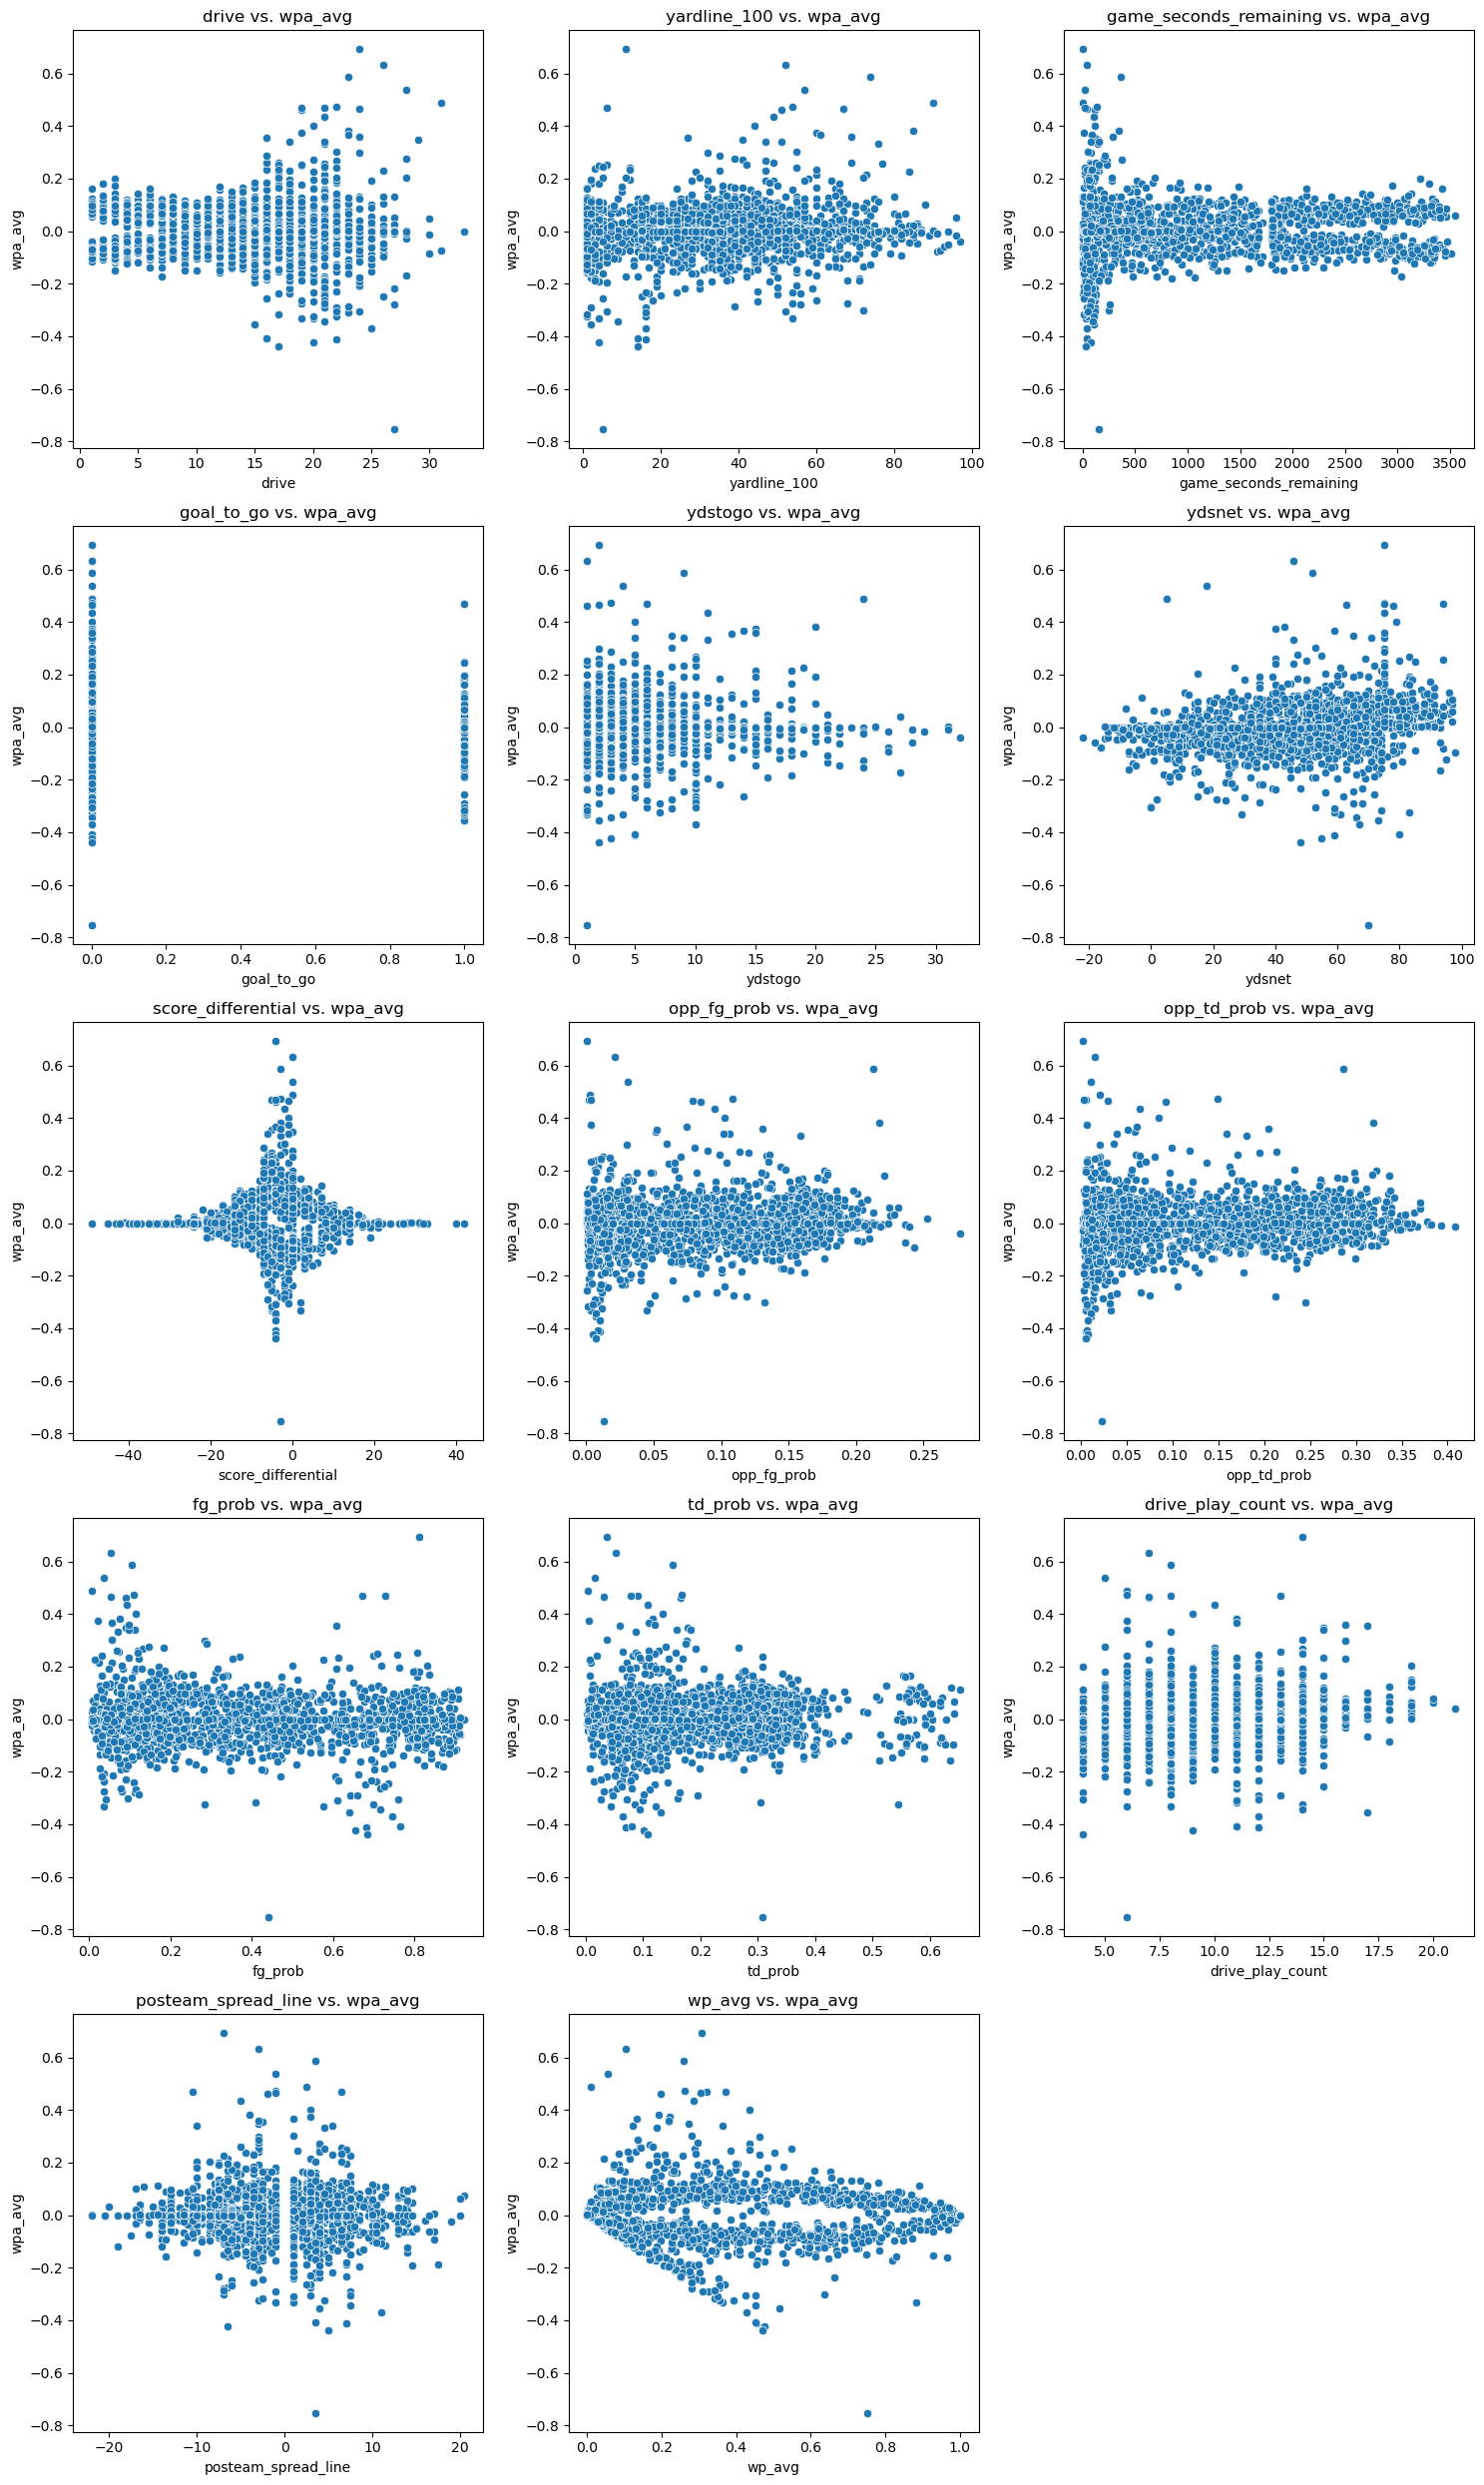

In [42]:

# Number of columns in each row
num_cols = 3

# Calculate the number of rows needed based on the number of independent variables
num_rows = (len(x_cols) + num_cols - 1) // num_cols

# Create subplots in rows of 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Iterate through the independent variables and create subplots
for i, var in enumerate(x_cols):
    row_index, col_index = divmod(i, num_cols)
    ax = axes[row_index, col_index]
    sns.scatterplot(data=passing, x=var, y='wpa_avg', ax=ax)
    ax.set_title(f'{var} vs. wpa_avg')

# Remove any empty subplots if the number of independent variables is not a multiple of num_cols
for i in range(len(x_cols), num_rows * num_cols):
    row_index, col_index = divmod(i, num_cols)
    fig.delaxes(axes[row_index, col_index])

plt.tight_layout()
plt.show()

In [248]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [249]:
from sklearn.decomposition import PCA
n_components = len(x_cols)
pca = PCA(n_components = n_components)

principalComponents = pca.fit_transform(X)

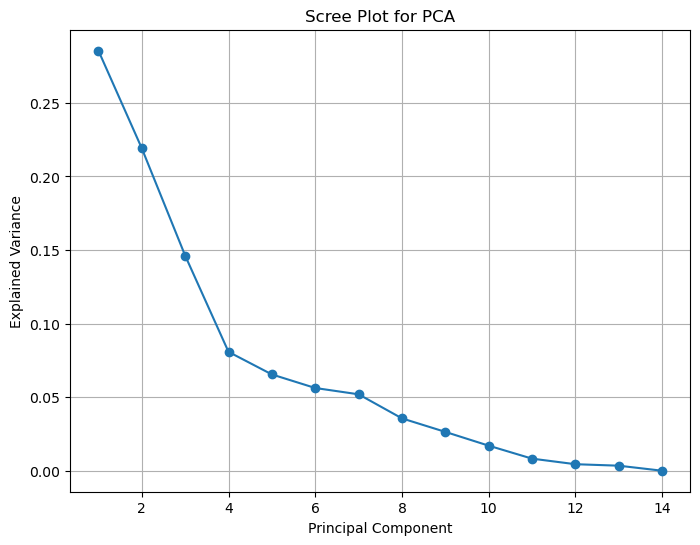

In [250]:
# Get the explained variances
explained_variances = pca.explained_variance_ratio_

# Create the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_components + 1), explained_variances, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot for PCA')
plt.grid()

# Show or save the plot
plt.show()

In [255]:
from sklearn.model_selection import train_test_split
X = passing[x_cols].to_numpy()
y = passing[y_col].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

print(f"Train length: {len(X_train)}, test length: {len(X_test)}")

Train length: 1736, test length: 434


In [162]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

def get_metrics(model, X_train, X_test, y_train, y_test):
    metric_names = ['explained var', 'mse', 'R^2']
    metrics = [explained_variance_score, mean_squared_error, r2_score]
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print("starting eval")
    for name, func in zip(metric_names, metrics):
        train_score = func(y_train, y_train_pred)
        test_score = func(y_test, y_test_pred)
        
        print(f"{name} (train): {train_score}")
        print(f"{name} (test): {test_score}\n")
        
def show_feature_importances(model):
    for name, imp in sorted(zip(x_cols, model.feature_importances_), key=lambda x:x[1], reverse=True):
        print(f"{name}: {imp}")

In [236]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
get_metrics(rf, X_train, X_test, y_train, y_test)
show_feature_importances(rf)

fitting model
starting eval
explained var (train): 0.9247485699280557
explained var (test): 0.4201355403414847

mse (train): 0.0006069198103938878
mse (test): 0.006583649390352398

R^2 (train): 0.9247436531038818
R^2 (test): 0.4200877802390912

score_differential: 0.15285333299221768
no_score_prob: 0.1028962676132673
game_seconds_remaining: 0.09784979029287
yardline_100: 0.06542792515091715
opp_td_prob: 0.06240122122690653
goal_to_go: 0.05321175895133189
td_prob: 0.047091191778014595
fg_prob: 0.0445842677747681
posteam_spread_line: 0.041158424914518016
drive_play_count: 0.03728881379794496
opp_fg_prob: 0.0346532689955837
week: 0.02761376518371478
wp_avg: 0.025269263946004716
ydsnet: 0.02293069712178548
half_seconds_remaining: 0.0206047419705208
ydstogo: 0.0028061567907568604


In [223]:
from sklearn.model_selection import GridSearchCV
import warnings

# Create a Random Forest Regressor
rf = RandomForestRegressor()

# Define a parameter grid to search
param_grid = {
    'n_estimators': [150],
    'max_depth': [50],
    'max_features': ['auto'],
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', verbose=2)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)  # X is your feature matrix, and y is your target variable

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best estimator (Random Forest model with the best hyperparameters)
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..max_depth=50, max_features=auto, n_estimators=150; total time=   1.6s
[CV] END ..max_depth=50, max_features=auto, n_estimators=150; total time=   1.5s
[CV] END ..max_depth=50, max_features=auto, n_estimators=150; total time=   1.4s
[CV] END ..max_depth=50, max_features=auto, n_estimators=150; total time=   1.5s
[CV] END ..max_depth=50, max_features=auto, n_estimators=150; total time=   1.5s


In [224]:
# {'max_depth': 30, 'max_features': 'auto', 'n_estimators': 100}
# {'max_depth': 50, 'max_features': 'auto', 'n_estimators': 150}
print(best_params)
params= {'max_depth': 50, 'max_features': 'auto', 'n_estimators': 150}
print(best_params)
get_metrics(best_rf_model, X_train, X_test, y_train, y_test)
show_feature_importances(best_rf_model )


{'max_depth': 50, 'max_features': 'auto', 'n_estimators': 150}
{'max_depth': 50, 'max_features': 'auto', 'n_estimators': 150}
fitting model
starting eval
explained var (train): 0.9132914000577498
explained var (test): 0.40537723376916435

mse (train): 0.0006992914725760306
mse (test): 0.006751409787483349

R^2 (train): 0.9132898271889905
R^2 (test): 0.4053108231868606

wp_avg: 0.16155100370468517
ydsnet: 0.1441779753237987
score_differential: 0.10199804469940818
game_seconds_remaining: 0.09651183841609769
yardline_100: 0.060870244053536575
opp_fg_prob: 0.05973561372193134
fg_prob: 0.05435756839729453
drive: 0.05256530211731667
opp_td_prob: 0.04991284601678896
drive_play_count: 0.04361741149583565
td_prob: 0.039971137563419724
no_score_prob: 0.03308705377593835
week: 0.02769343162329685
posteam_spread_line: 0.025066497101839714
half_seconds_remaining: 0.022871684209553877
ydstogo: 0.02181764414332096
goal_to_go: 0.0041947036359370644


In [256]:
# {'colsample_bytree': 0.8, 'eta': 0.05, 'max_depth': 30, 'min_child_weight': 8, 'n_estimators': 100, 'subsample': 0.95}
# {'colsample_bytree': 0.85, 'eta': 0.06, 'max_depth': 30, 'min_child_weight': 10, 'n_estimators': 100, 'subsample': 0.95}
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')
param_grid = {
    'max_depth': [30],
    'min_child_weight': [10],
    'subsample': [0.96],
    'colsample_bytree':[0.83],
    'n_estimators': [90,],
    'eta': [0.06]
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=5, scoring='r2', verbose=1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)  # X is your feature matrix, and y is your target variable

# Get the best hyperparameters
best_params = grid_search.best_params_
print(best_params)
# Get the best estimator (Random Forest model with the best hyperparameters)
best_xg_model = grid_search.best_estimator_

best_xg_model.fit(X_train, y_train)
get_metrics(best_xg_model, X_train, X_test, y_train, y_test)
show_feature_importances(best_xg_model)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'colsample_bytree': 0.83, 'eta': 0.06, 'max_depth': 30, 'min_child_weight': 10, 'n_estimators': 90, 'subsample': 0.96}
fitting model
starting eval
explained var (train): 0.9229997396469116
explained var (test): 0.41031473875045776

mse (train): 0.0006270594312809408
mse (test): 0.0067013585940003395

R^2 (train): 0.9222463923554094
R^2 (test): 0.40971951683171404

ydsnet: 0.13574083149433136
goal_to_go: 0.11349353194236755
yardline_100: 0.09705888479948044
score_differential: 0.08621347695589066
game_seconds_remaining: 0.08068886399269104
drive: 0.07960275560617447
wp_avg: 0.07346967607736588
drive_play_count: 0.059919361025094986
opp_fg_prob: 0.056357838213443756
fg_prob: 0.0534231960773468
td_prob: 0.044789932668209076
opp_td_prob: 0.04276662319898605
posteam_spread_line: 0.041705068200826645
ydstogo: 0.03477004915475845
